#Problem Understanding & Data Ingestion

## Define the objective

The objective of this project is to build a machine learning model that can effectively classify SMS messages as either "ham" (legitimate) or "spam". This is a binary classification problem.

## Load the dataset

The dataset is loaded from the 'spam.csv' file into a pandas DataFrame. This step was performed in a previous cell.

## Initial inspection

An initial inspection of the data was performed by displaying the head of the DataFrame and checking the data types and non-null counts using `df.head()` and `df.info()`. This helps in understanding the structure and basic characteristics of the dataset.

#Data Loading and Description

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#Exploratory Data Analysis (EDA)

,count
v1,
ham,4825
spam,747


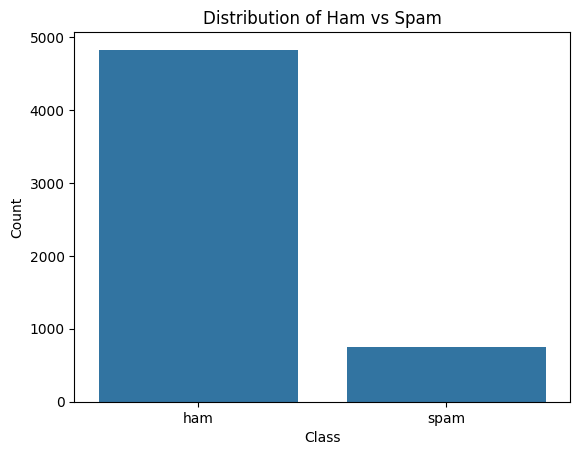

In [10]:
# Class distribution
display(df['v1'].value_counts())

# Visualize the class distribution
sns.countplot(x='v1', data=df)
plt.title('Distribution of Ham vs Spam')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

,message_length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


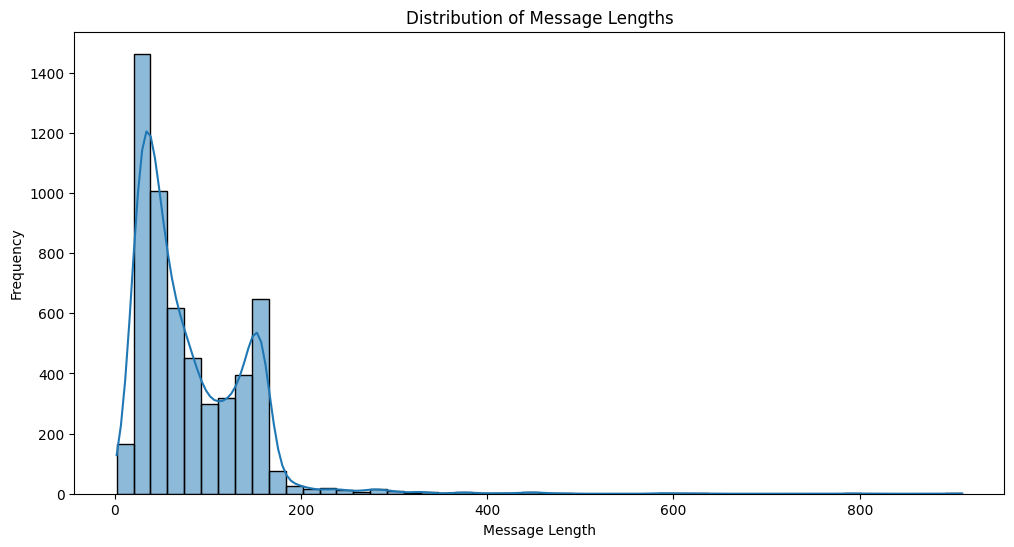

In [11]:
# Calculate message lengths
df['message_length'] = df['v2'].apply(len)

# Display descriptive statistics for message lengths
display(df['message_length'].describe())

# Visualize the distribution of message lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

In [12]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Download stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Function to process text and find common words
def get_common_words(text_list, n_most_common=20):
    words = []
    for text in text_list:
        # Remove punctuation and convert to lowercase
        text = re.sub(r'[^\w\s]', '', text.lower())
        words.extend(text.split())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Get the most common words
    common_words = Counter(filtered_words).most_common(n_most_common)
    return common_words

# Get common words in all messages
all_common_words = get_common_words(df['v2'].tolist())
print("Most common words in all messages:")
display(all_common_words)

# Get common words in ham messages
ham_common_words = get_common_words(df[df['v1'] == 'ham']['v2'].tolist())
print("\nMost common words in ham messages:")
display(ham_common_words)

# Get common words in spam messages
spam_common_words = get_common_words(df[df['v1'] == 'spam']['v2'].tolist())
print("\nMost common words in spam messages:")
display(spam_common_words)

Most common words in all messages:


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('u', 1119),
 ('call', 576),
 ('2', 478),
 ('im', 462),
 ('get', 386),
 ('ur', 384),
 ('4', 287),
 ('dont', 279),
 ('go', 278),
 ('ok', 277),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257),
 ('like', 242),
 ('got', 238),
 ('ill', 237),
 ('good', 234),
 ('come', 226),
 ('time', 208),
 ('day', 202)]


Most common words in ham messages:


[('u', 972),
 ('im', 449),
 ('2', 305),
 ('get', 303),
 ('ltgt', 276),
 ('ok', 272),
 ('dont', 257),
 ('go', 247),
 ('ur', 240),
 ('ill', 236),
 ('know', 232),
 ('got', 231),
 ('like', 229),
 ('call', 229),
 ('come', 224),
 ('good', 222),
 ('time', 189),
 ('day', 187),
 ('love', 185),
 ('4', 168)]


Most common words in spam messages:


[('call', 347),
 ('free', 216),
 ('2', 173),
 ('txt', 150),
 ('u', 147),
 ('ur', 144),
 ('mobile', 123),
 ('text', 120),
 ('4', 119),
 ('claim', 113),
 ('stop', 113),
 ('reply', 101),
 ('prize', 92),
 ('get', 83),
 ('new', 69),
 ('send', 67),
 ('nokia', 65),
 ('urgent', 63),
 ('cash', 62),
 ('win', 60)]

## Summary of EDA

Based on the exploratory data analysis:

- **Class Distribution:** The dataset is imbalanced, with a significantly higher number of ham messages compared to spam messages.
- **Message Length:** The distribution of message lengths shows that most messages are relatively short, with a few outliers that are much longer. We also observed potential differences in message length between ham and spam messages, with spam messages tending to be longer.
- **Common Words:** The most common words in ham and spam messages differ. Ham messages contain more conversational words, while spam messages frequently include words related to calls, money, prizes, and actions like "reply" and "stop." This suggests that word frequency can be a useful feature for distinguishing between ham and spam.

#Text Preprocessing

In [18]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text, stemming=False, lemmatization=False):
    """
    Performs text preprocessing steps.

    Args:
        text (str): The input text.
        stemming (bool): Whether to apply stemming.
        lemmatization (bool): Whether to apply lemmatization.

    Returns:
        list: A list of preprocessed tokens.
    """
    # Lowercasing
    text = text.lower()

    # Remove noise (punctuation and numbers)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming or Lemmatization
    if stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    elif lemmatization:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
# Apply preprocessing to the 'v2' column
df['processed_text'] = df['v2'].apply(preprocess_text, lemmatization=True)

# Display the DataFrame with the new processed text column
display(df.head())

,v1,v2,message_length,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[nah, dont, think, go, usf, life, around, though]"


#Feature Extraction (Text to Numerical Features)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of tokens back to strings for TfidfVectorizer
df['processed_text_string'] = df['processed_text'].apply(lambda x: ' '.join(x))

# Initialize TfidfVectorizer
# You might want to adjust parameters like max_features, min_df, max_df
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Example: consider top 5000 features

# Fit and transform the processed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text_string'])

# Display the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (5572, 5000)


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the list of tokens back to strings for CountVectorizer
df['processed_text_string'] = df['processed_text'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer
# You might want to adjust parameters like max_features, min_df, max_df
count_vectorizer = CountVectorizer(max_features=5000) # Example: consider top 5000 features

# Fit and transform the processed text data
count_matrix = count_vectorizer.fit_transform(df['processed_text_string'])

# Display the shape of the resulting Count matrix
print("Shape of Count matrix:", count_matrix.shape)

Shape of Count matrix: (5572, 5000)


In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Using the TF-IDF matrix as features
X = count_matrix
y = df['v1']

# Split data into training and testing sets
# You can adjust test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4179, 5000)
Shape of X_test: (1393, 5000)
Shape of y_train: (4179,)
Shape of y_test: (1393,)


#Model Training

##Multinomial Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using the training data
model.fit(X_train, y_train)

# The model is now trained and ready for evaluation
print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model trained successfully.


##Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000) # Increase max_iter for convergence

# Train the model using the training data
lr_model.fit(X_train, y_train)

# The model is now trained and ready for evaluation
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


##Model Model Evaluation

In [30]:
from sklearn.metrics import classification_report

# Evaluate Multinomial Naive Bayes model
y_pred_nb = model.predict(X_test)
print("Classification Report for Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Evaluate Logistic Regression model
y_pred_lr = lr_model.predict(X_test)
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1202
        spam       0.89      0.90      0.90       191

    accuracy                           0.97      1393
   macro avg       0.94      0.94      0.94      1393
weighted avg       0.97      0.97      0.97      1393


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1202
        spam       0.99      0.83      0.90       191

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393



##Models Comparison

In [32]:
import pandas as pd

# Extract relevant metrics from classification reports
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)

# Create DataFrames for easier comparison
nb_metrics_df = pd.DataFrame(nb_report).transpose()
lr_metrics_df = pd.DataFrame(lr_report).transpose()

# Display the metrics
print("Performance Metrics for Multinomial Naive Bayes:")
display(nb_metrics_df)

print("\nPerformance Metrics for Logistic Regression:")
display(lr_metrics_df)

Performance Metrics for Multinomial Naive Bayes:


,precision,recall,f1-score,support
ham,0.984167,0.982529,0.983347,1202.000000
spam,0.891192,0.900524,0.895833,191.000000
accuracy,0.971285,0.971285,0.971285,0.971285
macro avg,0.937679,0.941526,0.939590,1393.000000
weighted avg,0.971418,0.971285,0.971348,1393.000000



Performance Metrics for Logistic Regression:


,precision,recall,f1-score,support
ham,0.973258,0.999168,0.986043,1202.000000
spam,0.993711,0.827225,0.902857,191.000000
accuracy,0.975592,0.975592,0.975592,0.975592
macro avg,0.983484,0.913197,0.944450,1393.000000
weighted avg,0.976062,0.975592,0.974637,1393.000000


##Error analysis

In [33]:
import numpy as np

# Identify misclassified instances for Multinomial Naive Bayes
misclassified_nb_indices = np.where(y_test != y_pred_nb)[0]
misclassified_nb_messages = df.iloc[y_test.index[misclassified_nb_indices]]

print("Misclassified messages by Multinomial Naive Bayes:")
display(misclassified_nb_messages[['v1', 'v2', 'processed_text']].head())

# Identify misclassified instances for Logistic Regression
misclassified_lr_indices = np.where(y_test != y_pred_lr)[0]
misclassified_lr_messages = df.iloc[y_test.index[misclassified_lr_indices]]

print("\nMisclassified messages by Logistic Regression:")
display(misclassified_lr_messages[['v1', 'v2', 'processed_text']].head())

# You can further analyze these misclassified messages to find patterns

Misclassified messages by Multinomial Naive Bayes:


,v1,v2,processed_text
683,spam,Hi I'm sue. I am 20 years old and work as a la...,"[hi, im, sue, year, old, work, lapdancer, love..."
2664,ham,He remains a bro amongst bros,"[remains, bro, amongst, bros]"
4700,ham,I liked the new mobile,"[liked, new, mobile]"
2317,ham,Waqt se pehle or naseeb se zyada kisi ko kuch ...,"[waqt, se, pehle, naseeb, se, zyada, kisi, ko,..."
3979,spam,ringtoneking 84484,[ringtoneking]



Misclassified messages by Logistic Regression:


,v1,v2,processed_text
1044,spam,We know someone who you know that fancies you....,"[know, someone, know, fancy, call, find, pobox..."
683,spam,Hi I'm sue. I am 20 years old and work as a la...,"[hi, im, sue, year, old, work, lapdancer, love..."
4071,spam,Loans for any purpose even if you have Bad Cre...,"[loan, purpose, even, bad, credit, tenant, wel..."
2312,spam,tddnewsletter@emc1.co.uk (More games from TheD...,"[tddnewsletteremccouk, game, thedailydraw, dea..."
3979,spam,ringtoneking 84484,[ringtoneking]


#Key Feature Analysis (What drives spam detection)

In [34]:
# Key Feature Analysis for Logistic Regression Model

# Get the feature names (words) from the CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Get the coefficients of the Logistic Regression model
coefficients = lr_model.coef_[0]

# Create a pandas Series to easily associate coefficients with feature names
feature_importance = pd.Series(coefficients, index=feature_names)

# Sort the features by their importance (absolute value of coefficients)
sorted_importance = feature_importance.sort_values(ascending=False)

# Display the top positive coefficients (most indicative of spam)
print("Top features indicative of Spam:")
display(sorted_importance.head(20)) # Display top 20 positive coefficients

# Display the top negative coefficients (most indicative of ham)
print("\nTop features indicative of Ham:")
display(sorted_importance.tail(20)) # Display top 20 negative coefficients (least positive)

Top features indicative of Spam:


,0
txt,2.030980
service,1.959337
ringtone,1.873553
claim,1.853815
mobile,1.773832
call,1.763555
new,1.655253
text,1.653906
stop,1.620631
prize,1.575381



Top features indicative of Ham:


,0
right,-0.618037
love,-0.619631
didnt,-0.624506
got,-0.630135
might,-0.634842
ok,-0.635378
say,-0.642493
cant,-0.654321
ask,-0.659248
tell,-0.665129


#Conclusion and Potential Improvements

## Summary of Results

We have successfully built and evaluated two classification models, Multinomial Naive Bayes and Logistic Regression, for spam detection based on message content. Both models achieved high overall accuracy, precision, and recall on the test set, indicating good performance in distinguishing between ham and spam messages. The Logistic Regression model showed slightly better overall accuracy and precision for spam classification compared to Multinomial Naive Bayes, although Naive Bayes had a slightly higher recall for spam. The key feature analysis revealed that words like "txt", "service", "ringtone", and "call" are strong indicators of spam, while words like "ltgt", "sir", "ill", and "later" are more indicative of ham messages. Error analysis highlighted instances where the models struggled, providing insights into potential areas for improvement.

## Use-case Fit

These models appear to be well-suited for a spam detection use case, where the goal is to filter out unwanted messages. The high precision for spam with Logistic Regression is particularly valuable in minimizing false positives (legitimate messages incorrectly classified as spam), which is crucial for user satisfaction. The models can be integrated into messaging applications or email services to automatically flag or filter potential spam.

## Next Steps and Potential Improvements

1. **Addressing Class Imbalance:** The dataset is imbalanced. Techniques like oversampling the minority class (spam) or undersampling the majority class (ham) could be explored to potentially improve the recall for spam without significantly sacrificing precision.
2. **Feature Engineering:** Explore additional features beyond bag-of-words or TF-IDF, such as:
    - N-grams (combinations of words) to capture context.
    - Message length (although we've analyzed it, incorporating it as a feature might help).
    - Presence of specific punctuation or special characters often found in spam.
    - Sentiment analysis or topic modeling features.
3. **Exploring Other Models:** Evaluate other classification algorithms like Support Vector Machines (SVMs), Random Forests, or even deep learning models (e.g., LSTMs or transformers) which can capture more complex patterns in sequential text data.
4. **Hyperparameter Tuning:** Optimize the hyperparameters of the selected models (Multinomial Naive Bayes and Logistic Regression) using techniques like GridSearchCV or RandomizedSearchCV to potentially further improve performance.
5. **Larger and More Diverse Dataset:** Training on a larger and more diverse dataset could improve the generalizability of the model to different types of spam.
6. **User Feedback Loop:** Implement a system where users can provide feedback on misclassified messages to continuously improve the model over time.

## Business/Application Angle

Implementing an effective spam detection system has significant business value:

- **Improved User Experience:** Reduces clutter and annoyance caused by spam, leading to higher user satisfaction and engagement with the platform or service.
- **Increased Trust and Safety:** Protects users from malicious or fraudulent messages.
- **Reduced Costs:** For services that process messages, reducing spam volume can lead to lower infrastructure and processing costs.
- **Enhanced Data Quality:** For platforms that use user-generated content, filtering spam improves the quality of the data.

Overall, the developed models provide a strong foundation for a spam detection system, with clear avenues for further improvement to enhance performance and adapt to evolving spam tactics.